In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [152]:
df_train = pd.read_csv('input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('input/test_data/test_data.csv', sep=',')

In [153]:
col = ['op_setting_1', 'op_setting_2',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_18', 'sensor_20', 'sensor_21']

mean = df_train.mean()
std = df_train.std()

def preprocess(df, norm=True, rul=False):
    X = pd.DataFrame()
    X['engine_no'] = df['engine_no']
    X['time_in_cycles'] = df['time_in_cycles']
    if norm:
        for c in col:
            X[c] = (df[c] - mean[c])/std[c]
    else:
        for c in col:
            X[c] = df[c]
    if 'RUL' in df.columns:
        if rul:
            X['RUL'] = df['RUL']
        y = (df['RUL']<100).astype(int)
    else:
        y=None
    return X, y

In [154]:
X, y = preprocess(df_train, rul=True, norm=True)
X_test = preprocess(df_test, rul=True, norm=True)

In [155]:
eng_un = X['engine_no'].unique()
series = {}
for i in eng_un:
    series[i] = X[X['engine_no']==i]

In [156]:
l = []
for i, df in series.items():
    cor = [i] + df[df['RUL']>0].corr()['time_in_cycles'].tolist()[2:-1]
    l.append(cor)
l=np.array(l)
l.shape
l

array([[ 0.00000000e+00,  4.50650293e-02,  4.54134591e-02, ...,
        -3.68173012e-02, -5.10938106e-02, -5.00148473e-02],
       [ 1.00000000e+00, -6.55417653e-02, -4.45930391e-02, ...,
        -2.84730993e-02,  6.38869436e-02,  6.43144953e-02],
       [ 2.00000000e+00,  4.93060682e-02,  2.08970429e-02, ...,
         6.85065296e-02, -4.34575103e-02, -4.29470527e-02],
       ...,
       [ 7.06000000e+02, -1.67229082e-02,  2.30091625e-03, ...,
         0.00000000e+00, -6.91345165e-01, -6.98032872e-01],
       [ 7.07000000e+02,  9.95285303e-03, -2.18850323e-03, ...,
         9.43338802e-02,  3.47255111e-02,  3.42292226e-02],
       [ 7.08000000e+02, -6.48514022e-02, -8.37560617e-02, ...,
         9.47984179e-02,  6.93431151e-02,  6.84894901e-02]])

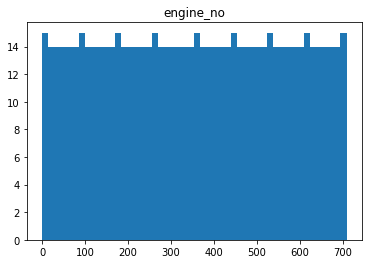

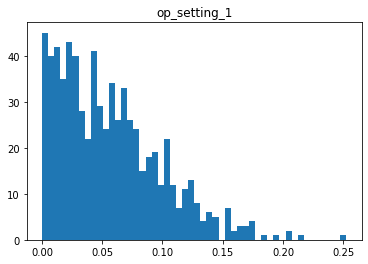

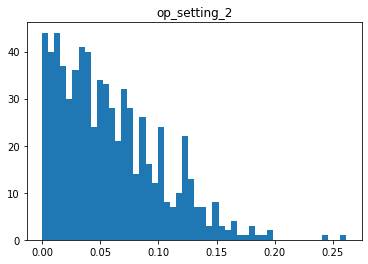

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


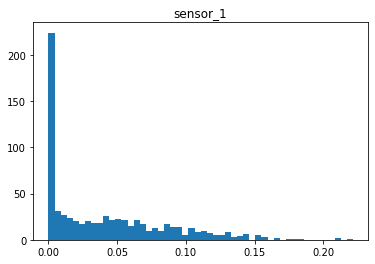

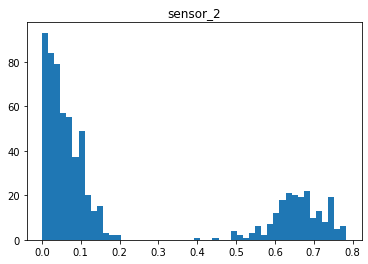

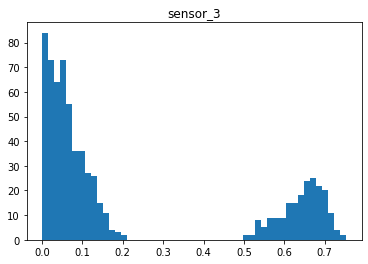

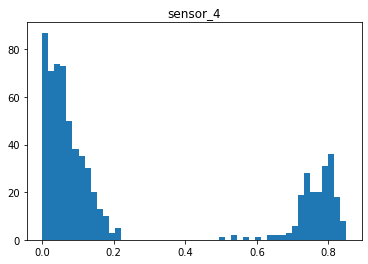

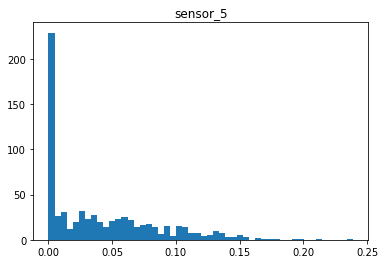

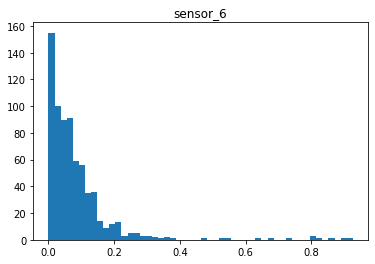

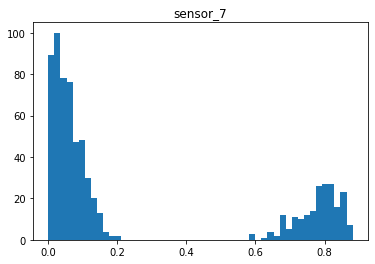

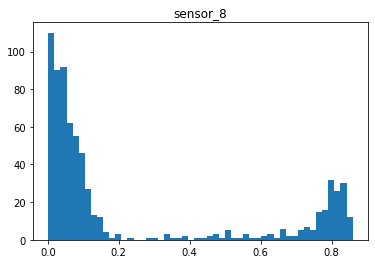

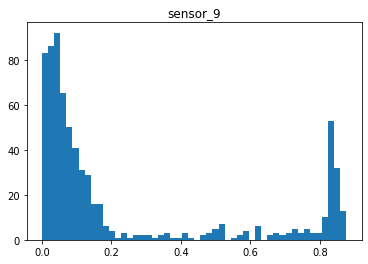

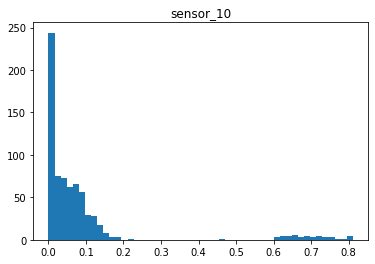

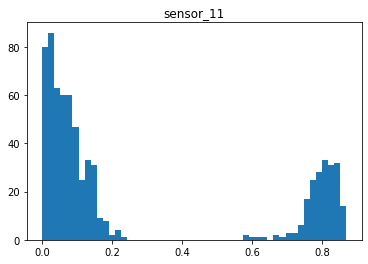

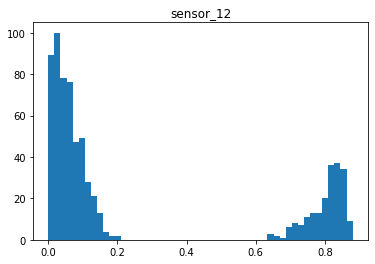

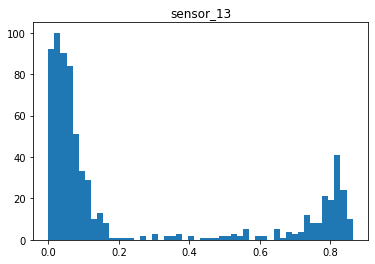

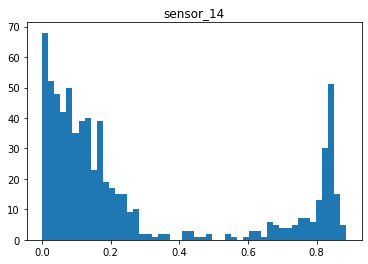

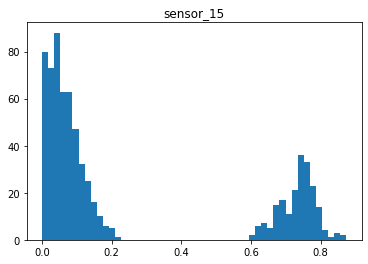

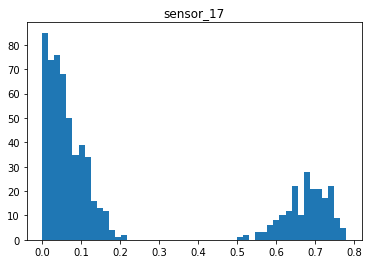

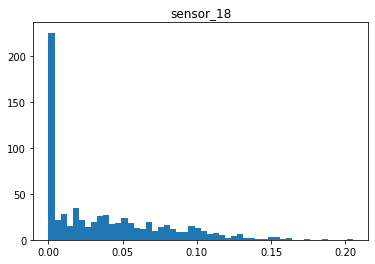

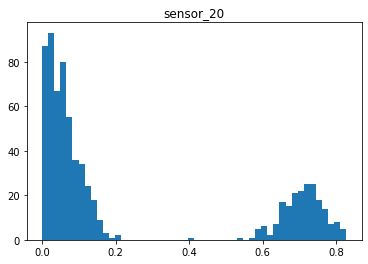

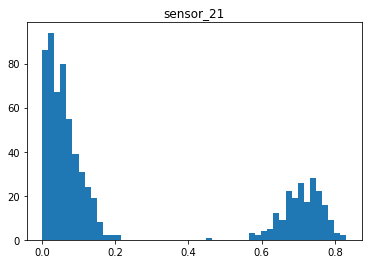

In [157]:
c = 'engine_no', 'op_setting_1', 'op_setting_2', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_20', 'sensor_21',
for i in range(22):
    plt.hist(np.abs(l[:, i]), bins=50)
    plt.title(c[i])
    plt.show()

In [158]:
df_cor = pd.DataFrame(l, columns=c)
df_cor=df_cor.dropna()
df_cor

,engine_no,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21
0,0.0,0.045065,0.045413,-0.037769,-0.033152,-0.009067,0.006174,-0.039250,-0.040536,-0.045353,...,-0.059600,0.019554,-0.045082,-0.023713,-0.045274,0.084543,-0.009148,-0.036817,-0.051094,-0.050015
1,1.0,-0.065542,-0.044593,0.047356,0.031300,0.053858,0.066677,0.068089,0.061094,0.065051,...,0.042169,0.052587,0.065118,-0.058919,0.108656,-0.042071,0.053892,-0.028473,0.063887,0.064314
2,2.0,0.049306,0.020897,-0.055194,-0.007445,0.041109,0.052128,-0.061216,-0.050463,-0.036464,...,0.044879,0.101665,-0.035958,0.114200,0.086084,-0.059776,0.034987,0.068507,-0.043458,-0.042947
3,3.0,0.000280,0.028717,0.001933,-0.046329,-0.040723,-0.033731,-0.002022,-0.016682,-0.024586,...,-0.074095,-0.059225,-0.024671,-0.162506,-0.026655,0.095615,-0.044240,-0.133867,-0.023478,-0.023964
4,4.0,0.094081,0.126296,-0.052070,-0.014375,0.018400,0.003685,-0.076529,-0.069308,-0.064052,...,-0.075866,0.061768,-0.063738,0.090641,0.002403,0.022325,0.013486,0.050440,-0.070190,-0.069394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,704.0,-0.101620,-0.057356,0.092160,0.084232,0.089668,0.108610,0.105986,0.101921,0.090646,...,0.030242,0.089188,0.090327,-0.030090,-0.002445,0.038265,0.093670,0.017468,0.089357,0.090327
705,705.0,0.132111,0.029804,0.000000,0.674237,0.689191,0.732318,0.000000,0.139726,-0.661996,...,0.000000,0.755927,-0.722044,0.399886,0.839864,0.731153,0.662394,0.000000,-0.663666,-0.645066
706,706.0,-0.016723,0.002301,0.000000,0.629965,0.538888,0.737106,0.000000,0.000000,-0.638746,...,0.000000,0.740772,-0.713799,0.305955,0.855682,0.688792,0.587901,0.000000,-0.691345,-0.698033
707,707.0,0.009953,-0.002189,0.024551,0.060106,0.100007,0.102588,0.013097,0.021787,0.043189,...,0.070044,0.136930,0.043744,0.103411,0.214071,-0.133775,0.101851,0.094334,0.034726,0.034229


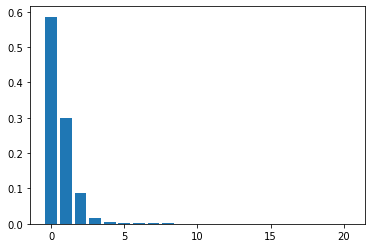

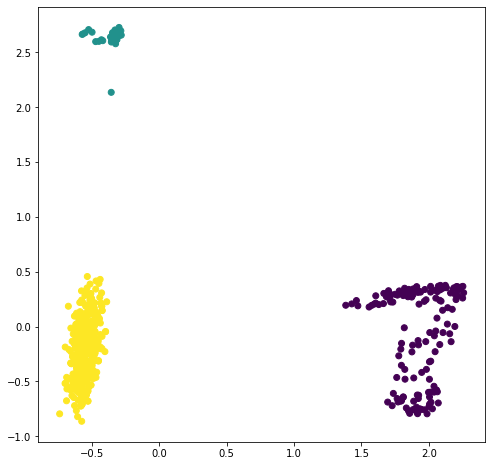

In [159]:
df = df_cor.drop(columns=['engine_no'])
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df)

pca = PCA()
cor_pca = pca.fit_transform(df)

expl = pca.explained_variance_ratio_
plt.bar(range(len(expl)), expl)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(cor_pca[:,0], cor_pca[:,1], c=y_pred)

In [160]:
df_cor['Failure']=y_pred
fail_type=df_cor[['engine_no', 'Failure']]
dataset = pd.merge(X, fail_type, how='left', on='engine_no')
dataset['GonnaFail'] = (dataset['RUL']<100).astype(int)
dataset = dataset.drop(columns=['RUL'])
dataset.head()

,engine_no,time_in_cycles,op_setting_1,op_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_18,sensor_20,sensor_21,Failure,GonnaFail
0,0,1,0.471650,0.570738,-0.765963,-1.424744,-1.781385,-1.591976,-0.666971,-0.838765,...,-1.059968,-2.889927,-2.647883,2.435204,-1.763259,-2.517341,-0.991557,-1.011323,2.0,0
1,0,2,1.076672,1.172198,-1.196595,-0.986876,-0.868334,-0.969966,-1.035035,-0.997053,...,-0.944738,0.346818,-0.196357,0.263382,-0.860657,-0.356136,-0.946224,-0.936969,2.0,0
2,0,3,0.471523,0.574815,-0.765963,-1.434632,-1.701673,-1.568058,-0.666971,-0.837213,...,-1.061551,-2.889747,-2.531168,2.462347,-1.731023,-2.517341,-1.003531,-1.005693,2.0,0
3,0,4,1.500033,1.170567,-1.342550,-1.128830,-0.943646,-1.064904,-1.403100,-1.350875,...,-1.267528,0.346188,0.051214,0.384061,-0.957364,-0.433322,-1.309739,-1.298334,2.0,0
4,0,5,1.076515,1.168664,-1.196595,-0.992290,-0.896936,-1.007530,-1.035035,-0.997053,...,-0.948697,0.346728,-0.133596,0.364502,-0.860657,-0.356136,-0.940237,-0.931966,2.0,0


In [161]:
df_0 = dataset[dataset['Failure']==0].drop(columns=['Failure'])
y_0 = y[dataset['Failure']==0]
df_1 = dataset[dataset['Failure']==1].drop(columns=['Failure'])
y_1 = y[dataset['Failure']==1]
df_2 = dataset[dataset['Failure']==2].drop(columns=['Failure'])
y_2 = y[dataset['Failure']==2]

In [162]:
!pip install xgboost

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier 

y_0 = df_0['GonnaFail']
df_0 = df_0.drop(columns=['GonnaFail'])

X_train0, X_test0, y_train0, y_test0 = train_test_split(df_0, y_0, test_size=0.2)

rf0 = RandomForestClassifier(n_estimators=80, criterion='entropy')
#rf0 = GradientBoostingClassifier(n_estimator=150)

rf0.fit(X_train0, y_train0)

y_pred0 = rf0.predict(X_test0)

print("Training score:", rf0.score(X_train0,y_train0))
print("Testing score: ", rf0.score(X_test0, y_test0))
print ("F1 score: " , f1_score(y_test0, y_pred0)) # 1.0


Training score: 1.0
Testing score:  0.8915878708835996
F1 score:  0.8897729156306979


In [163]:
y_1 = df_1['GonnaFail']
df_1 = df_1.drop(columns=['GonnaFail'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(df_1, y_1, test_size=0.15)

rf1 = RandomForestClassifier(n_estimators=105, criterion='entropy')

rf1.fit(X_train1,y_train1)
y_pred1=rf1.predict(X_test1)

print("Training score:", rf0.score(X_train1,y_train1))
print("Testing score: ", rf0.score(X_test1,y_test1))
print ("F1 score: " , f1_score(y_test1, y_pred1)) # 1.0

Training score: 0.8496924065742356
Testing score:  0.8471138845553822
F1 score:  0.891891891891892


In [164]:
y_2 = df_2['GonnaFail']
df_2 = df_2.drop(columns=['GonnaFail'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_2, y_2, test_size=0.2)

rf2 = RandomForestClassifier(n_estimators=80, criterion='entropy')

rf2.fit(X_train2, y_train2)

y_pred2 = rf2.predict(X_test2)

print("Training score:", rf2.score(X_train2,y_train2))
print("Testing score: ", rf2.score(X_test2, y_test2))
print ("F1 score: " , f1_score(y_test2, y_pred2)) # 1.0


Training score: 0.9999673934308632
Testing score:  0.8776193374489175
F1 score:  0.8585782466716905


In [165]:
X=X.drop(['RUL'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf = RandomForestClassifier(n_estimators=105, criterion='entropy')
#on génère 105 arbres aléatoires
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("Training score:", rf.score(X_train,y_train))
print("Testing score: ", rf.score(X_test,y_test))
print (f1_score(y_test, y_pred)) # 1.0

Training score: 0.9999922049779011
Testing score:  0.8839797954602145
0.8658760768482139


In [166]:
def prediction_proba(M,y,p):
    #M = [model1,model2,model3,modelG]
    
    #casse/pas casse dans les 100 prochains cycles
    y0 = M[0].predict(y)
    y1 = M[1].predict(y)
    y2 = M[2].predict(y)
    y3 = M[3].predict(y)
    
    #proba de casse dans les 100 prochains cycles
    y0p = M[0].predict_proba(y)[:,1]
    y1p = M[1].predict_proba(y)[:,1]   
    y2p = M[2].predict_proba(y)[:,1]
    y3p = M[3].predict_proba(y)[:,1]

    
    y_pred_p = []
    y_pred = []
    
    seuil = 0.6;
    
    for i in range(len(y)):
        if max(y0p[i],y1p[i],y2p[i],y3p[i])>=seuil:
            y_pred_p.append(max(y0p[i],y1p[i],y2p[i],y3p[i]))
        else:
            y_pred_p.append(p[0]*y0p[i]+p[1]*y1p[i]+p[2]*y2p[i]+p[3]*y3p[i])
        
        if y_pred_p[i]>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
        
        
    return(y_pred)
    

In [167]:
M = [rf0,rf1,rf2,rf]
p=(0.3,0.3,0.3,0.2)

In [168]:
X_test = preprocess(df_test, rul=True, norm=True)

In [169]:
y = prediction_proba(M,X_test[0],p)

In [170]:
X_test[0]['result']=y

In [171]:
final_df = X_test[0].drop_duplicates('engine_no', keep = 'last')

In [172]:
final_df[['engine_no', 'result']].to_csv('./submission3.csv', index=False)